# Handwritten Digit Classification with Neural Networks (MNIST data)

## 1. Introduction
This notebook demonstrates the process of building, training, and evaluating a neural network to classify handwritten digits using the MNIST dataset. The model's architecture includes hidden layers with activation functions, dropout for regularization, and an experiment to deactivate specific layers to observe their impact on accuracy.

**Summary :**

1. [Introduction](#1-Introduction)
2. [Importing Libraries](#2-Importing-Libraries)
3. [Loading and Visualizing Data](#3-Loading-and-Visualizing-Data)
4. [Data Exploration](#4-Data-Exploration)
5. [Data Preprocessing](#5-Data-Preprocessing)
6. [Model Architecture](#6-Model-Architecture)
7. [Layer Deactivation Experiment](#7-Layer-Deactivation-Experiment)
8. [Model Training](#8-Model-Training)
9. [Model Evaluation](#9-Model-Evaluation)
10. [Making Predictions](#10-Making-Predictions)
11. [Conclusion](#11-Conclusion)

## 2. Importing Libraries
We first import the necessary libraries, including TensorFlow for deep learning, NumPy for numerical computations, and Matplotlib for data visualization.

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



## 3. Loading and Visualizing Data
The MNIST dataset contains 28x28 grayscale images of handwritten digits (0–9). Here, we load the dataset and visualize a few samples.

In [4]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

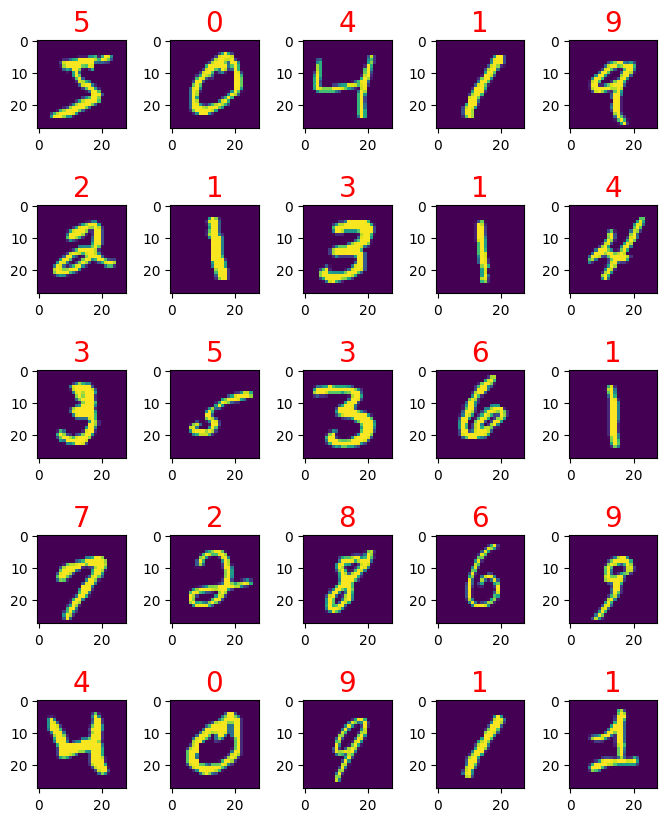

In [6]:
#show a exemple of digit
# plt.imshow(X_train[+/1], cmap='gray')
fig,ax = plt.subplots(5,5,figsize=(8,10))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(25):
    ax[i//5,i%5].imshow(X_train[i])
    ax[i//5,i%5].set_title(y_train[i],color='red',fontsize=20)
plt.show()



## 4. Data Exploration
Explore the dataset to understand its properties, including pixel intensity ranges, image resolution, and class distribution.

In [7]:
#check values of pixels
value_of_pixels = np.unique(X_train[0])
print("General Info : \n##############")
print(f"Number of classes : {len(np.unique(y_train))}")
print(f"classes : {np.unique(y_train)}")
print(f"Value of pixels : {value_of_pixels.min()} to {value_of_pixels.max()}")
print(f"Image Resolution : {X_train.shape[1]} x {X_train.shape[2]}")
print(f"Shape of X_train : {X_train.shape}")
print(f"Shape of y_train : {y_train.shape}")


General Info : 
##############
Number of classes : 10
classes : [0 1 2 3 4 5 6 7 8 9]
Value of pixels : 0 to 255
Image Resolution : 28 x 28
Shape of X_train : (60000, 28, 28)
Shape of y_train : (60000,)


## 5. Data Preprocessing
The data is normalized to scale pixel values to the range [0, 1]. Additionally, we use a subset of the data for faster experimentation.

In [8]:
#normalize the data
X_train = X_train/255.0
X_test = X_test/255.0


print(f"shape of X_train : {X_train.shape}")

shape of X_train : (60000, 28, 28)



## 6. Model Architecture
The neural network includes two hidden layers with ReLU activation, dropout for regularization, and an output layer with a softmax activation function. 



In [22]:
# Use only a subset of the data
X_train = X_train[:10000]
y_train = y_train[:10000]
X_test = X_test[:2000]
y_test = y_test[:2000]


# Build model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),  # Define the input shape explicitly
    tf.keras.layers.Flatten(),  # Flatten the input
    tf.keras.layers.Dense(512, activation='relu',name='hidden_layer_1'), # First hidden layer with 512 neurons
    tf.keras.layers.Dropout(0.2),  # Dropout with a rate of 20% (removes 20% of the input units)
    tf.keras.layers.Dense(250, activation='relu',name='hidden_layer_2'), # second hidden layer with 250 neurons
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(128, activation='relu',name='hidden_layer_3'),
    tf.keras.layers.Dropout(0.2),  
    tf.keras.layers.Dense(10, activation='softmax'), 

])

## 7. Layer Deactivation Experiment
Assess the impact of deactivating specific layers on model performance. Here are examples:
- Deactivating `hidden_layer_1` or `hidden_layer_2` decreased accuracy.
- Removing the third layer showed improvement.


In [23]:
# removing 
#? model.get_layer(name='hidden_layer_1').trainable = False  ##accurancy decreased
#? model.get_layer(name='hidden_layer_2').trainable = False  ##accurancy decreased
model.get_layer(name='hidden_layer_3').trainable = False  ##accurancy increased

In [24]:
# Compile the model with Adam optimizer, sparse categorical crossentropy loss, and accuracy metric
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Display the model architecture, including the layers, output shapes, and number of parameters in the model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_1 (Dense)          │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 250)            │       128,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_3 (Dense)          │ (None, 128)            │        32,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 563,588 (2.15 MB)

 Trainable params: 531,460 (2.03 MB)

 Non-trainable params: 32,128 (125.50 KB)

## 8. Model Training
Train the model on the training data while reserving 20% for validation. Monitor the loss and accuracy metrics during training.

In [13]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6793 - loss: 1.0077 - val_accuracy: 0.9130 - val_loss: 0.2848
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9214 - loss: 0.2594 - val_accuracy: 0.9265 - val_loss: 0.2360
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9472 - loss: 0.1819 - val_accuracy: 0.9380 - val_loss: 0.2117
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9649 - loss: 0.1273 - val_accuracy: 0.9420 - val_loss: 0.1914
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9737 - loss: 0.0903 - val_accuracy: 0.9435 - val_loss: 0.1844
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9750 - loss: 0.0777 - val_accuracy: 0.9515 - val_loss: 0.1842
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9815 - loss: 0.0667 - val_accuracy: 0.9510 - val_loss: 0.1852
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9826 - loss: 0.0536 - val_accuracy: 0.

## 9. Model Evaluation
Evaluate the model's performance on the test dataset and visualize the training history.

In [14]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss * 100:.2f}%")
print(f"Test accuracy: {accuracy * 100:.2f}%")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9565 - loss: 0.2017
Test loss: 23.58%
Test accuracy: 94.60%


Text(0.5, 1.0, 'Training and Validation Loss')

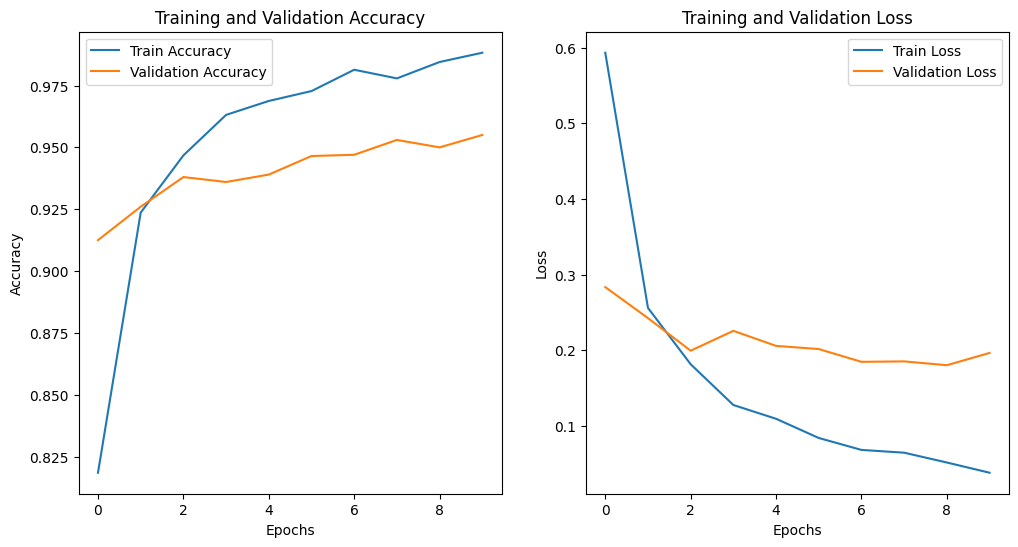

In [30]:
fig = plt.figure(figsize=(12, 6))

# Plot training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

## 10. Making Predictions
Predicts classes for **all test samples**, compares predictions with actual labels, and calculates overall accuracy.

In [19]:
# Make predictions for the entire test dataset
predictions = model.predict(X_test)

# Get the predicted classes for all test samples
predicted_classes = np.argmax(predictions, axis=1)

# Print the first 10 predictions and their corresponding actual labels for verification
for i in range(10):  
    print(f"Sample {i}: Predicted = {predicted_classes[i]}, Actual = {y_test[i]}")


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Sample 0: Predicted = 7, Actual = 7
Sample 1: Predicted = 2, Actual = 2
Sample 2: Predicted = 1, Actual = 1
Sample 3: Predicted = 0, Actual = 0
Sample 4: Predicted = 4, Actual = 4
Sample 5: Predicted = 1, Actual = 1
Sample 6: Predicted = 4, Actual = 4
Sample 7: Predicted = 9, Actual = 9
Sample 8: Predicted = 6, Actual = 5
Sample 9: Predicted = 9, Actual = 9


Generates and visualizes a confusion matrix to evaluate model performance across all classes.

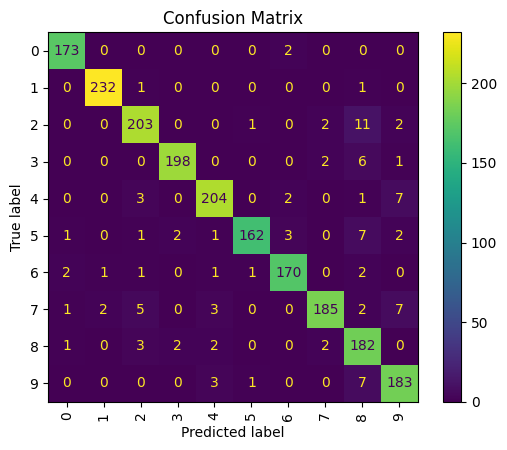

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Generate the confusion matrix
cm = confusion_matrix(y_test, predicted_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap='viridis', xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()

Test the model on a **single image** to visualize the prediction and compare it with the true label.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted number: 5
Actual number: 5


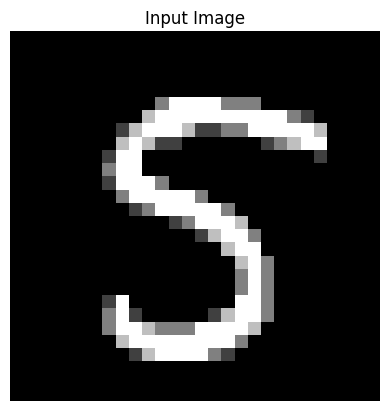

In [21]:
# Add batch dimension to the single sample
single_sample = np.expand_dims(X_test[978], axis=0)  # Shape: (1, 28, 28, 1)

# Make a prediction
prediction = model.predict(single_sample)

# Get the predicted class
predicted_class = prediction.argmax(axis=1)[0]
print(f"Predicted number: {predicted_class}")

# Compare with actual label
print(f"Actual number: {y_test[978]}")

# Visualize the sample
plt.imshow(X_test[978], cmap='gray')  # Reshape if needed
plt.title("Input Image")
plt.axis('off')
plt.show()

## 11. Conclusion
In this notebook, we successfully built and trained a neural network to classify handwritten digits with high accuracy. The layer deactivation experiment revealed the importance of individual layers in feature extraction and decision-making. Further improvements can be explored by tuning hyperparameters or adding convolutional layers for better performance.